<a href="https://colab.research.google.com/github/sanchesprogramer/Springboot-Joca/blob/main/C%C3%B3pia_de_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
from sklearn.datasets import load_iris
from sklearn import tree
import graphviz
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance
import pandas as pd
from sklearn import datasets
from matplotlib import pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [60]:
dataset = pd.read_csv("https://raw.githubusercontent.com/sanchesprogramer/Ciencia_de_dados/main/trab2.csv?token=GHSAT0AAAAAACXFVVTZM4APIPEVHKMCEHT2ZW44J6Q", sep = ";")

In [6]:
dataset.head()

,Curva,Tipo_De_Material,Setor_Industrial,Unidade_Volume
0,A,PRODUTO_ACABADO,INDÚSTRIA_FARMACÊUTICA,TONELADA
1,A,PRODUTO_SEMIACABADO,CONSTRUÇÃO_INDUSTRIAL,UNIDADE
2,A,PRODUTO_MATERIA_PRIMA,ENGENHARIA_MECÂNICA,KG
3,A,PRODUTO_COMERCIALIZÁVEL,INDÚSTRIA_FARMACÊUTICA,LIBRA
4,A,MATERIAL_ALTO_VALOR,INDÚSTRIA_FARMACÊUTICA,GRAMA


In [61]:
dataset.shape

(181, 4)

In [62]:
X = dataset.iloc[:,[0,1,2,3]]
print(X)

    Curva         Tipo_De_Material        Setor_Industrial Unidade_Volume
0       A          PRODUTO_ACABADO  INDÚSTRIA_FARMACÊUTICA       TONELADA
1       A      PRODUTO_SEMIACABADO   CONSTRUÇÃO_INDUSTRIAL        UNIDADE
2       A    PRODUTO_MATERIA_PRIMA     ENGENHARIA_MECÂNICA             KG
3       A  PRODUTO_COMERCIALIZÁVEL  INDÚSTRIA_FARMACÊUTICA          LIBRA
4       A      MATERIAL_ALTO_VALOR  INDÚSTRIA_FARMACÊUTICA          GRAMA
..    ...                      ...                     ...            ...
176     C      PRODUTO_SEMIACABADO     ENGENHARIA_MECÂNICA        UNIDADE
177     C    PRODUTO_MATERIA_PRIMA  INDÚSTRIA_FARMACÊUTICA             KG
178     C  PRODUTO_COMERCIALIZÁVEL                 QUÍMICA          LIBRA
179     C      MATERIAL_ALTO_VALOR     ENGENHARIA_MECÂNICA          GRAMA
180     C          PRODUTO_ACABADO  INDÚSTRIA_FARMACÊUTICA       TONELADA

[181 rows x 4 columns]


In [63]:
y = dataset.iloc[:,[0]]
print(y)

    Curva
0       A
1       A
2       A
3       A
4       A
..    ...
176     C
177     C
178     C
179     C
180     C

[181 rows x 1 columns]


In [64]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')

In [65]:
one_hot_data = pd.get_dummies(X[['Tipo_De_Material','Setor_Industrial','Unidade_Volume']], drop_first=True)

In [66]:
clf = clf.fit(one_hot_data, y)

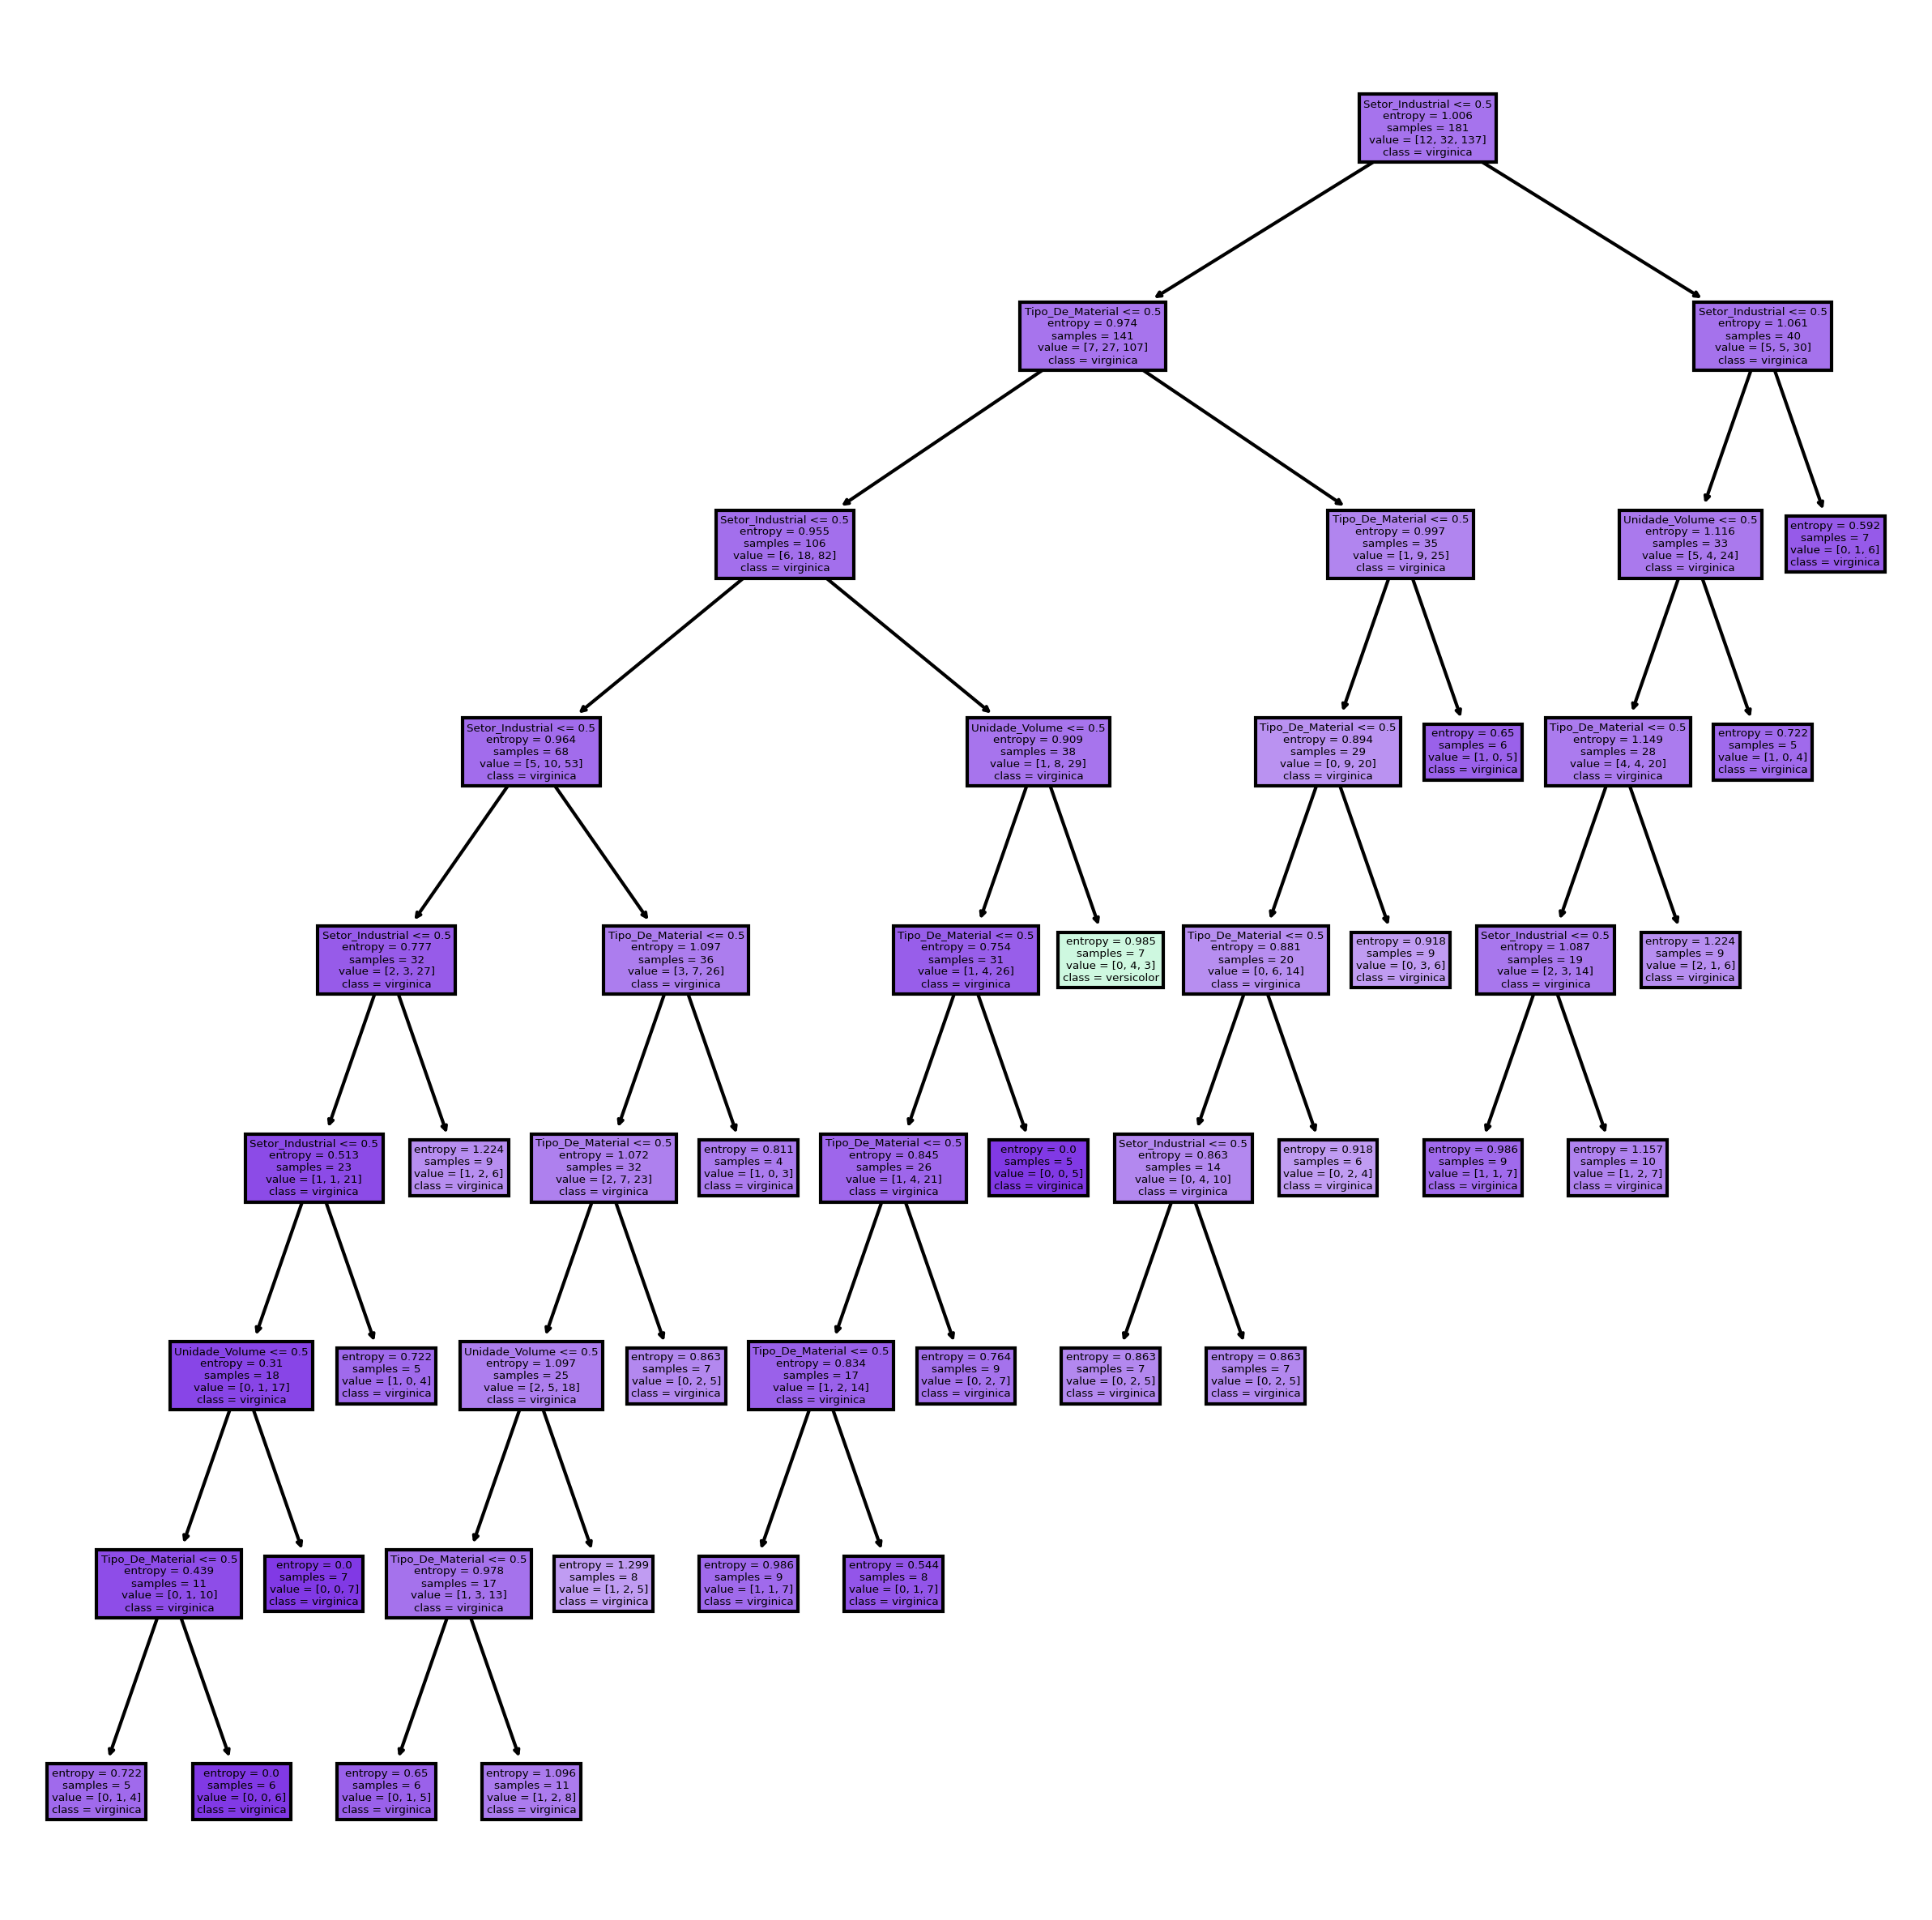

In [67]:
X_encoded = pd.get_dummies(dataset[['Tipo_De_Material', 'Setor_Industrial', 'Unidade_Volume']])

# Defina os nomes originais das colunas
original_feature_names = ['Tipo_De_Material', 'Setor_Industrial', 'Unidade_Volume']

# Agora substituímos as colunas codificadas pelos nomes originais
# Criamos uma lista com o mesmo número de itens que `X_encoded.columns`, mas com nomes originais
fn_mapped = []
for col in X_encoded.columns:
    if 'Tipo_De_Material' in col:
        fn_mapped.append('Tipo_De_Material')
    elif 'Setor_Industrial' in col:
        fn_mapped.append('Setor_Industrial')
    elif 'Unidade_Volume' in col:
        fn_mapped.append('Unidade_Volume')

# Agora use esses nomes no plot_tree
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10,10), dpi=300)
tree.plot_tree(clf,
               feature_names=fn_mapped,  # Use a lista mapeada para os nomes originais
               class_names=cn,           # Nomes das classes
               filled=True)
fig.savefig('imagename.png')